# EECS 4422 Assignment 2

## Import Libraries

In [821]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import cv2
import torch
import torch.nn as nn
import os
import kornia
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
rcParams['figure.figsize'] = 11,8
plt.gray()

<Figure size 792x576 with 0 Axes>

## Functions

In [822]:
#Displays Tensors as image
def imshowTorch(input):
    # (height, width) = input.shape[2],input.shape[3]
    # image = input.numpy()
    # image = np.reshape(image, (height, width))
    image = kornia.tensor_to_image(input)
    plt.imshow(image)

In [823]:
#Converts numpy arrays to Kornia compatable tensors
def toKornia(img):
    print(img.shape)
    img = kornia.image_to_tensor(img) #Kornia in shape BCHW
    print(img.shape)
    #Adding in dummy axis from: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/
    img = torch.unsqueeze(img, dim=0)
    print(img.shape)
    return img

In [824]:
#Converts images to grayscale
def img2grayscale(img):
    img = img.astype(np.float32)/255
    img = (img[:,:,0]+ img[:,:,1]+ img[:,:,2]) / 3

    return img

In [825]:
#Q1.1
def MyCanny(img, sigma, tau):
    
    #GaussianBlur2D from https://kornia.readthedocs.io/en/latest/filters.html
    gauss = kornia.filters.GaussianBlur2d((3, 3), (sigma, sigma))

    img_blur = gauss(img)

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    #By default 1st order derivative and 'diff' derivative modality
    gradient = kornia.filters.spatial_gradient(img_blur)

    #Find magnitude and 1st order derivatives https://kornia-tutorials.readthedocs.io/en/latest/filtering_edges.html
    #   and edges-pff document given in A2 document: https://drive.google.com/file/d/0Bz1dfcnrpXM-QVpHZ1p6SUxoaXM/view?resourcekey=0-aYFhFiQTvM4x5CbfN5gllg
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)

    fig, ax = plt.subplots(1,3, figsize=(30,30))
    ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
    ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))

    #Threshold grad magnitude above given tau
    img_grad_mag = img_grad_mag / img_grad_mag.max() * 255
    img_grad_mag = img_grad_mag > tau
    ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return 0

    

In [826]:
def conv_func(img, kernel):
    #Get dimensions of images
    (iH, iW) = img.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # for j in range(2,x-2):
    #     for k in range(2,y-2):
    #         neibour_r = img[j-2:j+3,k-2:k+3,0]
    #         sum_r = neibour_r*kernel
    #         sum_r = sum_r.sum()
    #         img[j,k,0] = sum_r
    #         neibour_g = img4[j-2:j+3,k-2:k+3,1]
    #         sum_g = neibour_g*kernel
    #         sum_g = sum_g.sum()
    #         img[j,k,1] = sum_g
    #         neibour_b = img[j-2:j+3,k-2:k+3,2]
    #         sum_b = neibour_b*kernel
    #         sum_b = sum_b.sum()
    #         img[j,k,2] = sum_b
    return 0

### Question 1

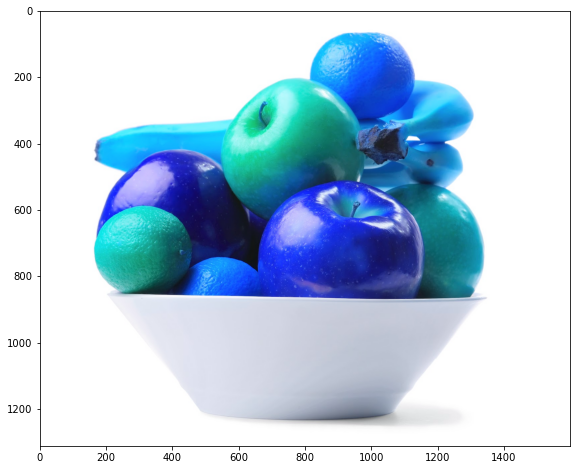

In [827]:
fruit = cv2.imread('bowl-of-fruit.jpg')
plt.imshow(fruit)

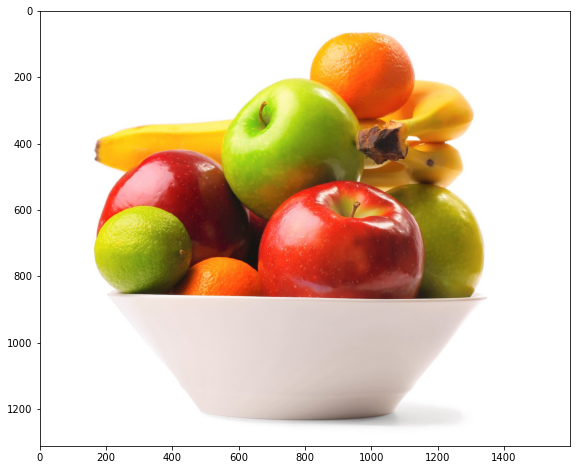

In [828]:
fruit = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)
plt.imshow(fruit)

In [829]:
#Convert to Grayscale
#fruit_gr = fruit.astype(np.float32)/255
#fruit_gr = (fruit_gr[:,:,0]+ fruit_gr[:,:,1]+ fruit_gr[:,:,2]) / 3
#fruit_gr = cv2.cvtColor(fruit, cv2.COLOR_RGB2GRAY)
fruit_gr = img2grayscale(fruit)

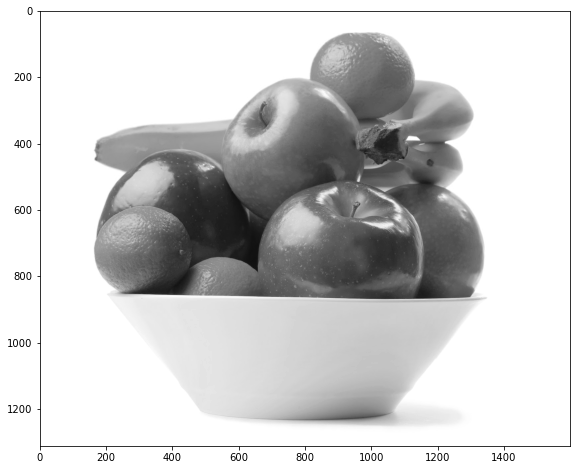

In [830]:
plt.imshow(fruit_gr)

In [831]:
#fruit_k: torch.tensor = kornia.image_to_tensor(fruit_gr)
#fruit_k = kornia.image_to_tensor(fruit_gr) #Kornia in shape BCHW

In [832]:
#fruit_k.shape

In [833]:
#Adding in dummy axis from: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/
#fruit_k = torch.unsqueeze(fruit_k, dim=0)

In [834]:
#fruit_k.shape

In [835]:
fruit_k = toKornia(fruit_gr)

(1312, 1600)
torch.Size([1, 1312, 1600])
torch.Size([1, 1, 1312, 1600])


In [836]:
type(fruit_k)

torch.Tensor

In [837]:
#foo = kornia.tensor_to_image(fruit_k)

In [838]:
#foo.shape

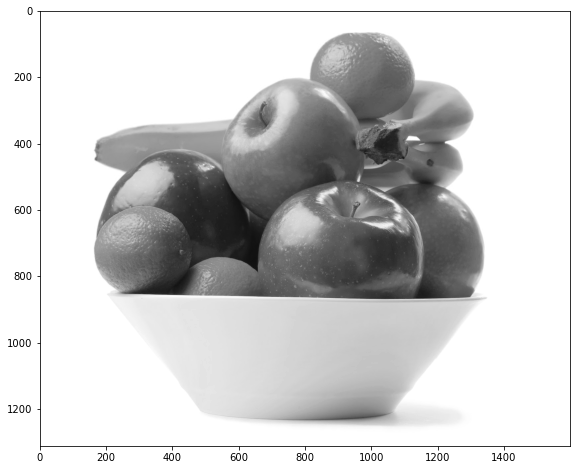

In [839]:
imshowTorch(fruit_k)

0

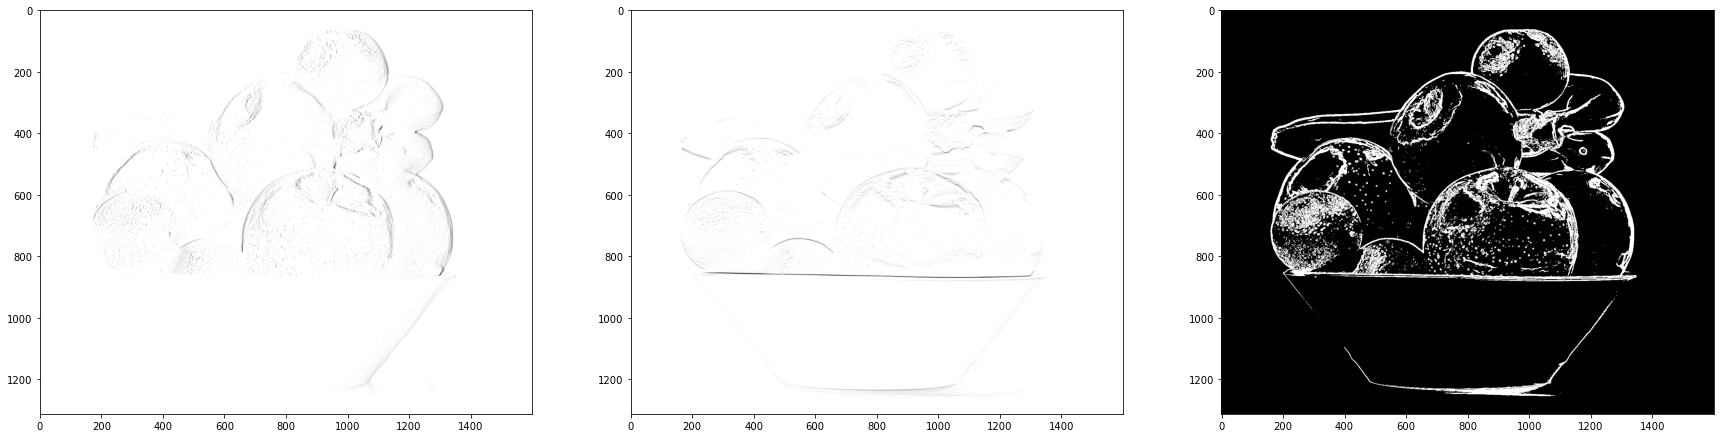

In [840]:
MyCanny(fruit_k, 1.5, 11)

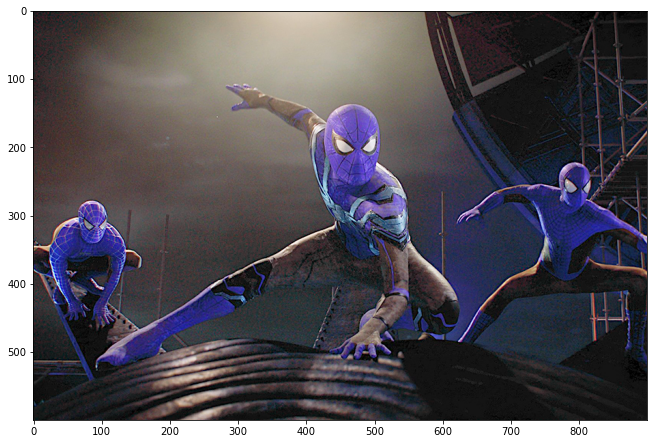

In [841]:
spidey = cv2.imread('Spider-Man-No-Way-Home-triple-threat.jpg')
plt.imshow(spidey)

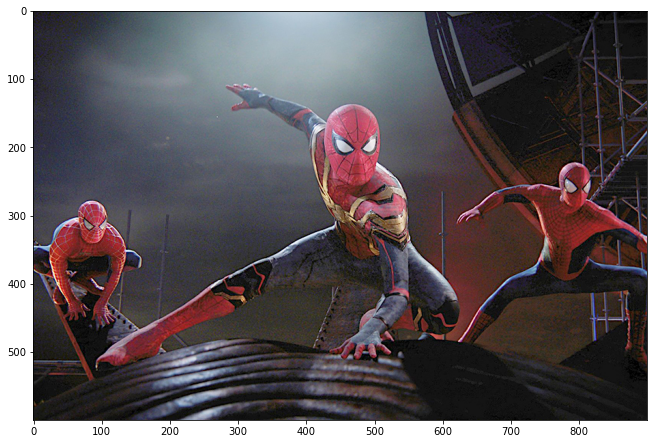

In [842]:
spidey = cv2.cvtColor(spidey, cv2.COLOR_BGR2RGB)
plt.imshow(spidey)

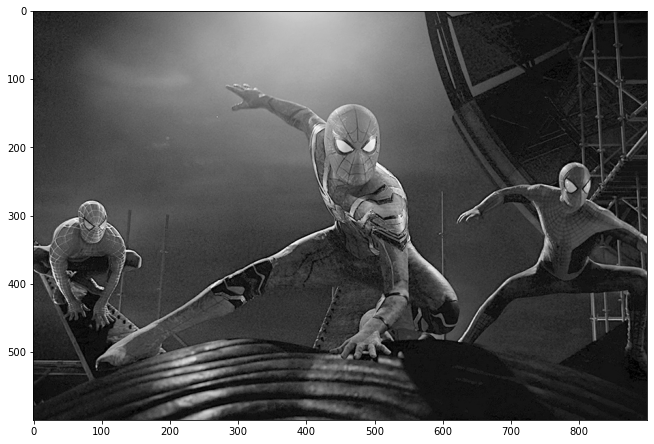

In [843]:
spidey_gr = img2grayscale(spidey)
plt.imshow(spidey_gr)

In [844]:
spidey_k = toKornia(spidey_gr)

(600, 900)
torch.Size([1, 600, 900])
torch.Size([1, 1, 600, 900])


In [845]:
type(spidey_k)

torch.Tensor

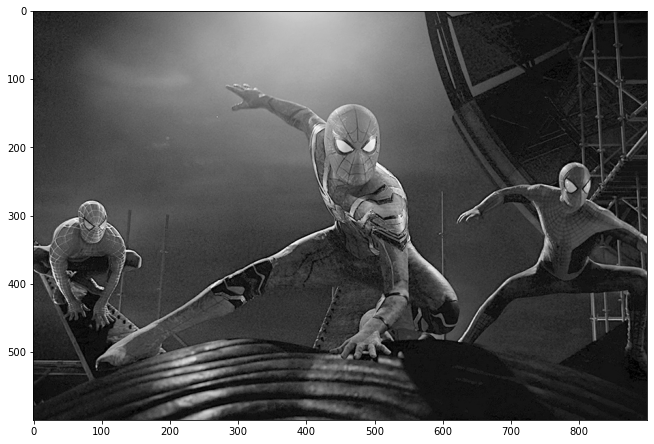

In [846]:
imshowTorch(spidey_k)

0

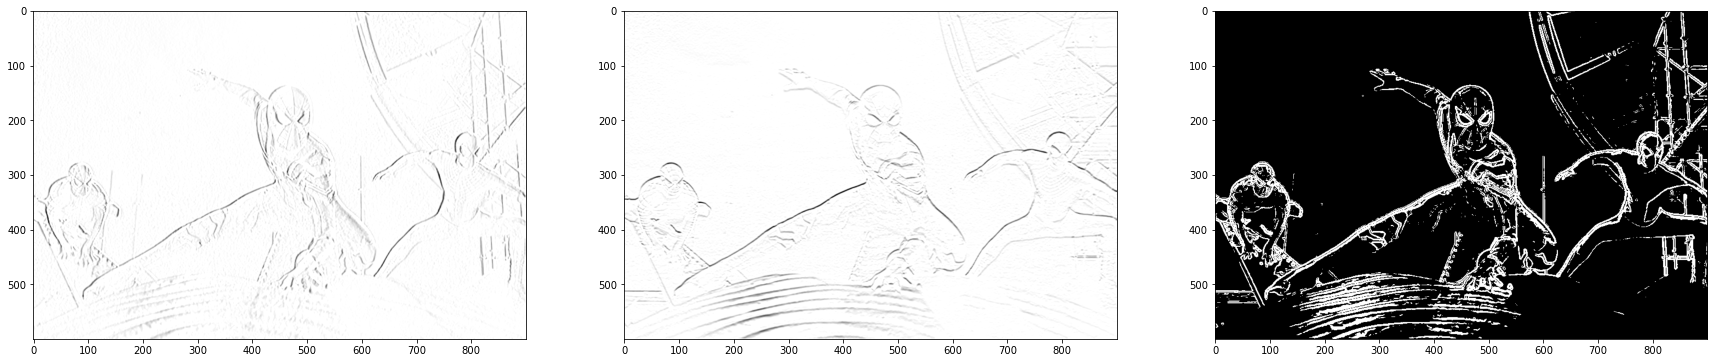

In [849]:
MyCanny(spidey_k, 1.5, 30)

### Question 2